### import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import cross_validation
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.cross_validation import train_test_split
import keras

/home/user/classification/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [3]:
#loading data into pandas
female = pd.read_csv('female.txt', header=None)
male = pd.read_csv('male.txt', header=None)
female.columns=['name']
male.columns=['name']


In [4]:
#adding gender columns and concatenating two frames
female['gender'] = 'f'
male['gender'] = 'm'
frames = [female,male]
names = pd.concat(frames).reset_index()
#names.reset_index()
names.drop(names[['index']],axis = 1,inplace = True)
names

,name,gender
0,Abagael,f
1,Abagail,f
2,Abbe,f
3,Abbey,f
4,Abbi,f
5,Abbie,f
6,Abby,f
7,Abigael,f
8,Abigail,f
9,Abigale,f


In [5]:
names['name'] = names['name'].str.lower()
names

,name,gender
0,abagael,f
1,abagail,f
2,abbe,f
3,abbey,f
4,abbi,f
5,abbie,f
6,abby,f
7,abigael,f
8,abigail,f
9,abigale,f


In [6]:
# setting parameters
batch_size = 10
num_classes = 2
epochs = 10
#early stopping
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

In [7]:
# finding maximum length of the name
field_length = names.name.astype(str).map(len)
print(len(names.loc[field_length.argmax(), 'name']))

15


In [8]:
# function for finding ascii values
def ascii(df):
    names = df
    ascii = []
    for c in names['name']:
        s = [ord(s) for s in c]
        while(len(s)<15):
            s.append(0)
        ascii.append(s)
    return ascii    

In [9]:
# taking f values as 0 and m values as 1
f= names[names['gender']=='f']
f['gender'] = 0
m= names[names['gender']=='m']
m['gender'] = 1



/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
frames = [f,m]
final_dataset = pd.concat(frames).reset_index()
#names.reset_index()
final_dataset.drop(final_dataset[['index']],axis = 1,inplace = True)
final_dataset

,name,gender
0,abagael,0
1,abagail,0
2,abbe,0
3,abbey,0
4,abbi,0
5,abbie,0
6,abby,0
7,abigael,0
8,abigail,0
9,abigale,0


In [11]:
#test-train split
x_train, x_test = train_test_split(final_dataset, train_size = 0.8)
y_train = pd.DataFrame(x_train['gender'])
y_test = pd.DataFrame(x_test['gender'])
x_train.drop(['gender'],axis=1,inplace=True)
x_test.drop(['gender'],axis=1,inplace=True)

/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
y_train

,gender
4456,0
2661,0
6134,1
2261,0
7619,1
1648,0
1238,0
4490,0
7681,1
5754,1


In [13]:
#xtrain = np.array(ascii(x_train))/255
#xtest = np.array(ascii(x_test))/255
xtrain = np.array(ascii(x_train))
xtest = np.array(ascii(x_test))
print(xtrain)
xtrain = (xtrain-97)/26
xtest = (xtest-97)/26
ytrain = y_train.values.tolist()
ytrain = keras.utils.to_categorical(ytrain, num_classes)
#ytrain


[[115 105 103 ...,   0   0   0]
 [107  97 116 ...,   0   0   0]
 [104 101  98 ...,   0   0   0]
 ..., 
 [110  97 110 ...,   0   0   0]
 [106 111 114 ...,   0   0   0]
 [114 111  98 ...,   0   0   0]]


In [14]:
ytrain

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

### Function for plotting the graph

In [15]:
def plotting(model_1):
    plt.plot(model_1.history['acc'])
    plt.plot(model_1.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(model_1.history['loss'])
    plt.plot(model_1.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Model_1 1 hidden layer

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
3s - loss: 0.6958 - acc: 0.6064 - val_loss: 0.6428 - val_acc: 0.6310
Epoch 2/10
3s - loss: 0.6470 - acc: 0.6359 - val_loss: 0.6139 - val_acc: 0.6790
Epoch 3/10
3s - loss: 0.6196 - acc: 0.6676 - val_loss: 0.6499 - val_acc: 0.6176
Epoch 4/10
3s - loss: 0.6073 - acc: 0.6743 - val_loss: 0.6267 - val_acc: 0.6585
Epoch 5/10
3s - loss: 0.6000 - acc: 0.6731 - val_loss: 0.5937 - val_acc: 0.6680
Epoch 6/10
3s - loss: 0.5973 - acc: 0.6792 - val_loss: 0.5844 - val_acc: 0.6711
Epoch 00005: early stopping


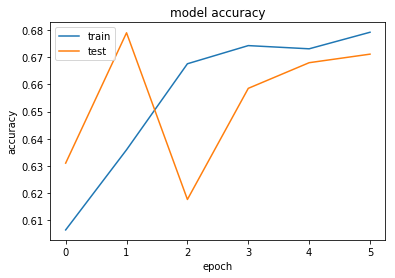

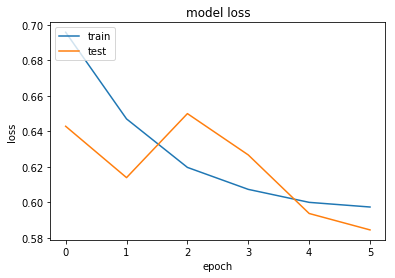

In [16]:
model1 = Sequential()
model1.add(Dense(600, activation='relu', input_shape=(15,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_1 = model1.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_1)

In [29]:
model1.

AttributeError: 'Sequential' object has no attribute 'hist'

### Model_2 2 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
23659s - loss: 0.6837 - acc: 0.6159 - val_loss: 0.6551 - val_acc: 0.6302
Epoch 2/10
6s - loss: 0.6579 - acc: 0.6298 - val_loss: 0.6394 - val_acc: 0.6483
Epoch 3/10
5s - loss: 0.6328 - acc: 0.6532 - val_loss: 0.6739 - val_acc: 0.6105
Epoch 4/10
5s - loss: 0.6220 - acc: 0.6601 - val_loss: 0.6077 - val_acc: 0.6703
Epoch 5/10
5s - loss: 0.6111 - acc: 0.6725 - val_loss: 0.6545 - val_acc: 0.6546
Epoch 6/10
5s - loss: 0.6048 - acc: 0.6756 - val_loss: 0.6465 - val_acc: 0.6648
Epoch 7/10
5s - loss: 0.5984 - acc: 0.6731 - val_loss: 0.6426 - val_acc: 0.6310
Epoch 8/10
5s - loss: 0.6005 - acc: 0.6762 - val_loss: 0.6159 - val_acc: 0.6294
Epoch 00007: early stopping


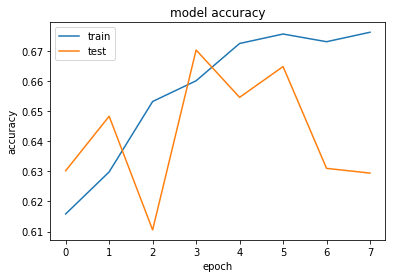

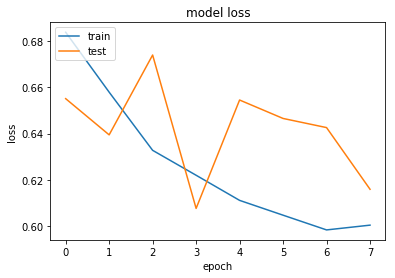

In [16]:
model2 = Sequential()
model2.add(Dense(400, activation='relu', input_shape=(15,)))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_2 = model2.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_2)

### Model_3 3 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
3s - loss: 0.6782 - acc: 0.6190 - val_loss: 0.6575 - val_acc: 0.6302
Epoch 2/10
4s - loss: 0.6606 - acc: 0.6251 - val_loss: 0.6500 - val_acc: 0.6318
Epoch 3/10
3s - loss: 0.6459 - acc: 0.6369 - val_loss: 0.6353 - val_acc: 0.6483
Epoch 4/10
3s - loss: 0.6295 - acc: 0.6550 - val_loss: 0.6062 - val_acc: 0.6546
Epoch 5/10
3s - loss: 0.6164 - acc: 0.6640 - val_loss: 0.6314 - val_acc: 0.6562
Epoch 6/10
3s - loss: 0.6094 - acc: 0.6701 - val_loss: 0.6218 - val_acc: 0.6436
Epoch 7/10
3s - loss: 0.6018 - acc: 0.6719 - val_loss: 0.6332 - val_acc: 0.6585
Epoch 8/10
3s - loss: 0.6055 - acc: 0.6678 - val_loss: 0.6005 - val_acc: 0.6672
Epoch 9/10
3s - loss: 0.5958 - acc: 0.6833 - val_loss: 0.6207 - val_acc: 0.6609
Epoch 10/10
3s - loss: 0.5943 - acc: 0.6861 - val_loss: 0.5979 - val_acc: 0.6719
Epoch 00007: early stopping


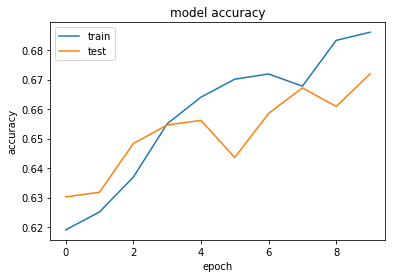

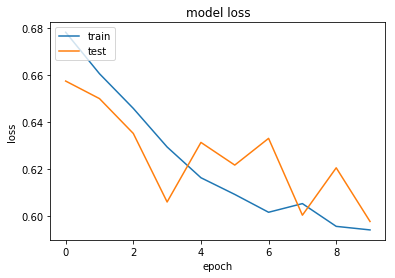

In [17]:
model3 = Sequential()
model3.add(Dense(200, activation='relu', input_shape=(15,)))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(400, activation='relu'))
model3.add(Dense(500, activation='relu'))
model3.add(Dense(2, activation='softmax'))
model3.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_3 = model3.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_3)

### Model_4 4 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
9s - loss: 0.6777 - acc: 0.6249 - val_loss: 0.6675 - val_acc: 0.6302
Epoch 2/10
9s - loss: 0.6668 - acc: 0.6267 - val_loss: 0.6595 - val_acc: 0.6302
Epoch 3/10
10s - loss: 0.6629 - acc: 0.6239 - val_loss: 0.6568 - val_acc: 0.6302
Epoch 4/10
9s - loss: 0.6613 - acc: 0.6241 - val_loss: 0.6590 - val_acc: 0.6302
Epoch 5/10
9s - loss: 0.6580 - acc: 0.6284 - val_loss: 0.6719 - val_acc: 0.6326
Epoch 00004: early stopping


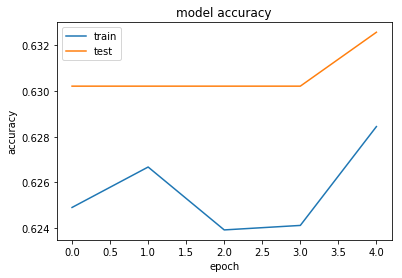

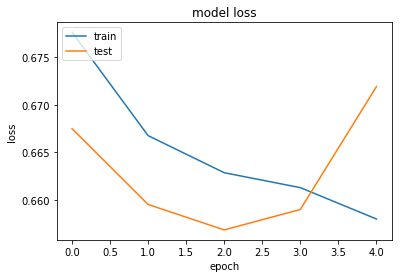

In [18]:
model4 = Sequential()
model4.add(Dense(300, activation='relu', input_shape=(15,)))
model4.add(Dense(400, activation='relu'))
model4.add(Dense(500, activation='relu'))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(700, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_4 = model4.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_4)

### Model_5 5 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
14s - loss: 0.6854 - acc: 0.6279 - val_loss: 0.6549 - val_acc: 0.6302
Epoch 2/10
14s - loss: 0.6634 - acc: 0.6267 - val_loss: 0.6543 - val_acc: 0.6302
Epoch 3/10
15s - loss: 0.6590 - acc: 0.6259 - val_loss: 0.6531 - val_acc: 0.6389
Epoch 4/10
14s - loss: 0.6504 - acc: 0.6332 - val_loss: 0.6362 - val_acc: 0.6436
Epoch 5/10
14s - loss: 0.6393 - acc: 0.6511 - val_loss: 0.6401 - val_acc: 0.6459
Epoch 6/10
14s - loss: 0.6275 - acc: 0.6637 - val_loss: 0.6073 - val_acc: 0.6617
Epoch 7/10
15s - loss: 0.6196 - acc: 0.6631 - val_loss: 0.6242 - val_acc: 0.6688
Epoch 8/10
14s - loss: 0.6181 - acc: 0.6644 - val_loss: 0.6093 - val_acc: 0.6751
Epoch 9/10
14s - loss: 0.6102 - acc: 0.6688 - val_loss: 0.6118 - val_acc: 0.6664
Epoch 10/10
14s - loss: 0.6032 - acc: 0.6674 - val_loss: 0.6096 - val_acc: 0.6648
Epoch 00004: early stopping


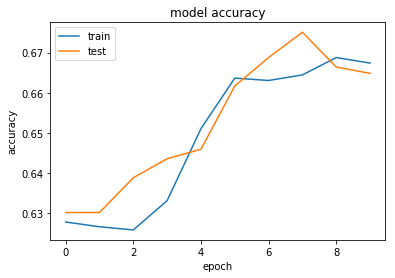

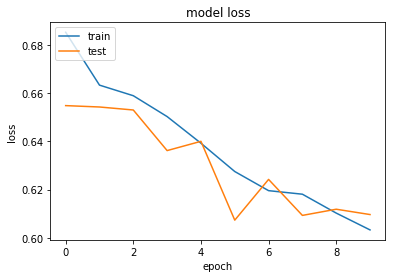

In [19]:
model5 = Sequential()
model5.add(Dense(300, activation='relu', input_shape=(15,)))
model5.add(Dense(400, activation='relu'))
model5.add(Dense(500, activation='relu'))
model5.add(Dense(600, activation='relu'))
model5.add(Dense(700, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(2, activation='softmax'))
model5.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_5 = model5.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_5)

In [20]:
#model1.predict('anand')
def predict(test):
    t = []
    s = [ord(s) for s in test]
    t.append(s)
    xp = np.array(t)
    xp = (xp-97)/26
    print(xp)
    model1.predict(xp)
predict('anand')    

[[ 0.          0.5         0.          0.5         0.11538462]]


ValueError: Error when checking : expected dense_1_input to have shape (None, 15) but got array with shape (1, 5)

In [ ]:
model1.predict(xtest)

In [ ]:
xtest